In [2]:
filepath = "/home/jackson/research/data/tortuosity_study/QC_results/tortuosity_test_set_QC/results.tsv"

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(filepath, sep='\t', skiprows=5)
df.head()

,#dataset:filename,comments,image_bounding_box,base_mag,type,levels,height,width,mpp_x,mpp_y,...,chan3_brightness,chan3_brightness_std,chan1_brightness_YUV,chan1_brightness_std_YUV,chan2_brightness_YUV,chan2_brightness_std_YUV,chan3_brightness_YUV,chan3_brightness_std_YUV,pixels_to_use,warnings
0,_1692336.svs,,"(0, 0, 29880, 29204)",20.0,aperio,3,29204,29880,0.5048,0.5048,...,150.565057,29.573064,0.449301,0.128450,0.069461,0.018343,0.140160,0.052509,67402,NaN
1,_1692337.svs,,"(0, 0, 35856, 25986)",20.0,aperio,3,25986,35856,0.5048,0.5048,...,169.077202,22.559759,0.528611,0.105268,0.066158,0.016366,0.123489,0.045890,113365,NaN
2,_1692338.svs,,"(0, 0, 33864, 25576)",20.0,aperio,3,25576,33864,0.5048,0.5048,...,168.196360,24.743278,0.530567,0.102701,0.063495,0.015220,0.141725,0.047332,171440,NaN
3,_1692339.svs,,"(0, 0, 25896, 27003)",20.0,aperio,3,27003,25896,0.5048,0.5048,...,152.112397,27.355965,0.461524,0.113190,0.066432,0.018055,0.129851,0.048459,112601,NaN
4,_1692340.svs,,"(0, 0, 21912, 19222)",20.0,aperio,3,19222,21912,0.5048,0.5048,...,164.054125,22.272283,0.506868,0.099749,0.067164,0.013673,0.137005,0.045038,98438,NaN


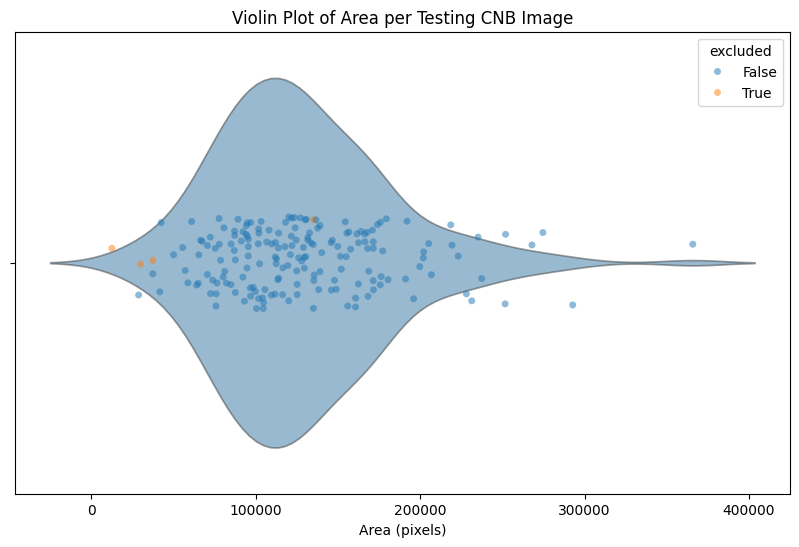

In [31]:

filesnames_excluded = {"_1692405.svs", "_1692409.svs", "_1694644.svs", "_1694658.svs"}

df['excluded'] = df['#dataset:filename'].apply(lambda x: True if x in filesnames_excluded else False)

plt.figure(figsize=(10, 6))
sns.violinplot(x=df["pixels_to_use"], inner=None, alpha=0.5)
sns.stripplot(data=df, x="pixels_to_use", hue="excluded", alpha=0.5, jitter=True)
plt.title("Violin Plot of Area per Testing CNB Image")
plt.xlabel("Area (pixels)")
plt.show()


In [26]:
smallest_pixels = df.nsmallest(5, 'pixels_to_use')[['#dataset:filename', 'pixels_to_use']]
print(smallest_pixels)

   #dataset:filename  pixels_to_use
59      _1692405.svs          12475
78      _1693229.svs          28719
87      _1694644.svs          29792
95      _1694652.svs          37349
63      _1692409.svs          37399
